In [41]:
#import important libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns
import numpy as np
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
%matplotlib inline




In [43]:
#create dataframe and perform initial data inspection

In [44]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [47]:
#look at a heatmap of the data to see if there are any potentially correlated values

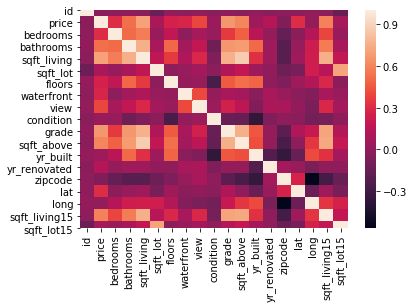

In [48]:
corr = df.corr()
sns.heatmap(corr);

In [49]:
# it looks like sqft_living, bathrooms, bedrooms, and grade are the most correlated with price.
# clean up the presentation to be more certain. 

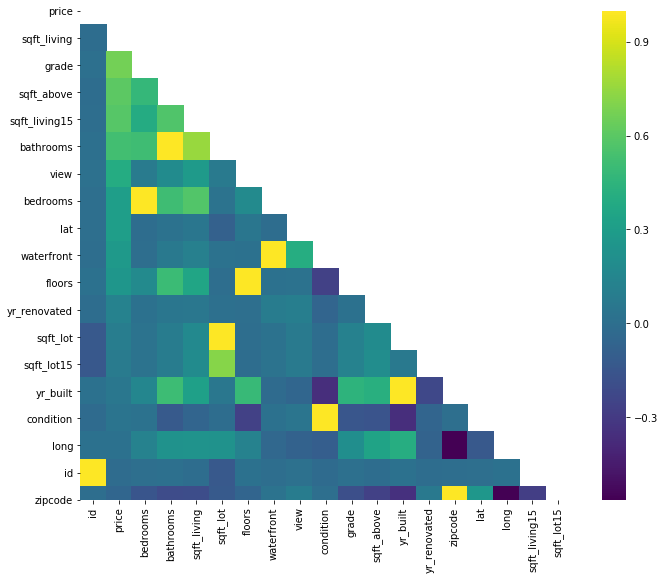

In [50]:
corr = corr.sort_values(by="price", ascending = False)
mask = np.triu(np.ones_like(corr,dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [51]:
#isolating positively correlated with 'price'

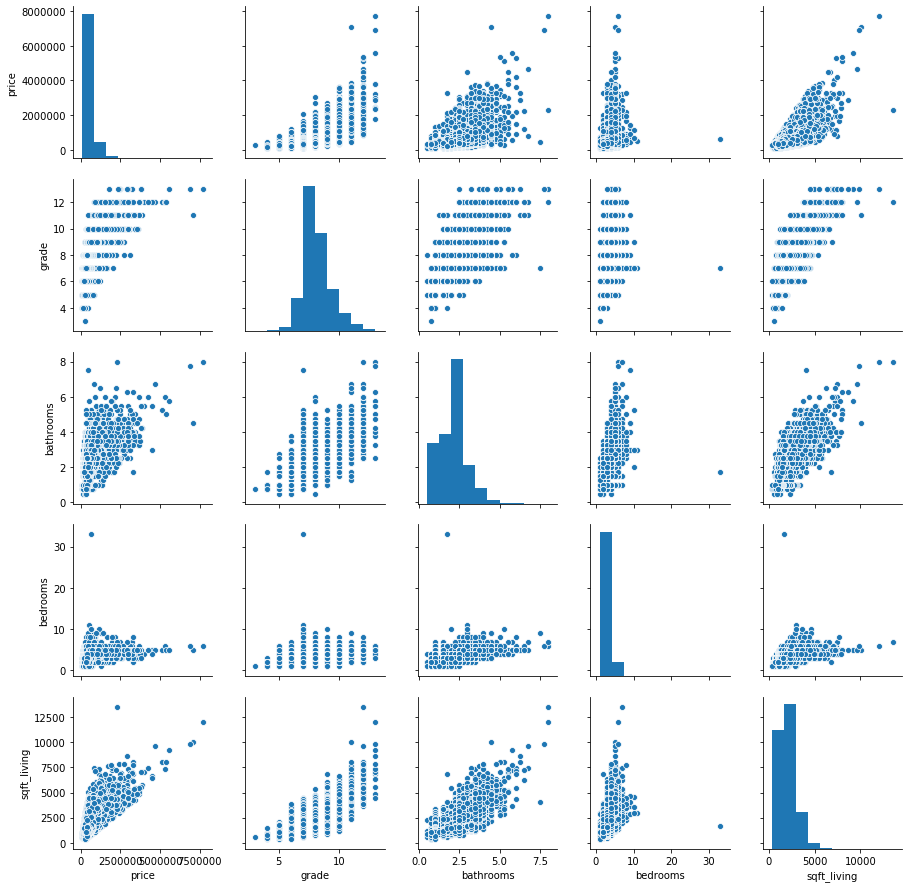

In [52]:
positively_correlated_cols = ['price','grade', 'bathrooms', 'bedrooms', 'sqft_living']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [53]:
#sqft_living looks the most normal, however there are outliers that can be dealt with

In [54]:
#check for outliers 

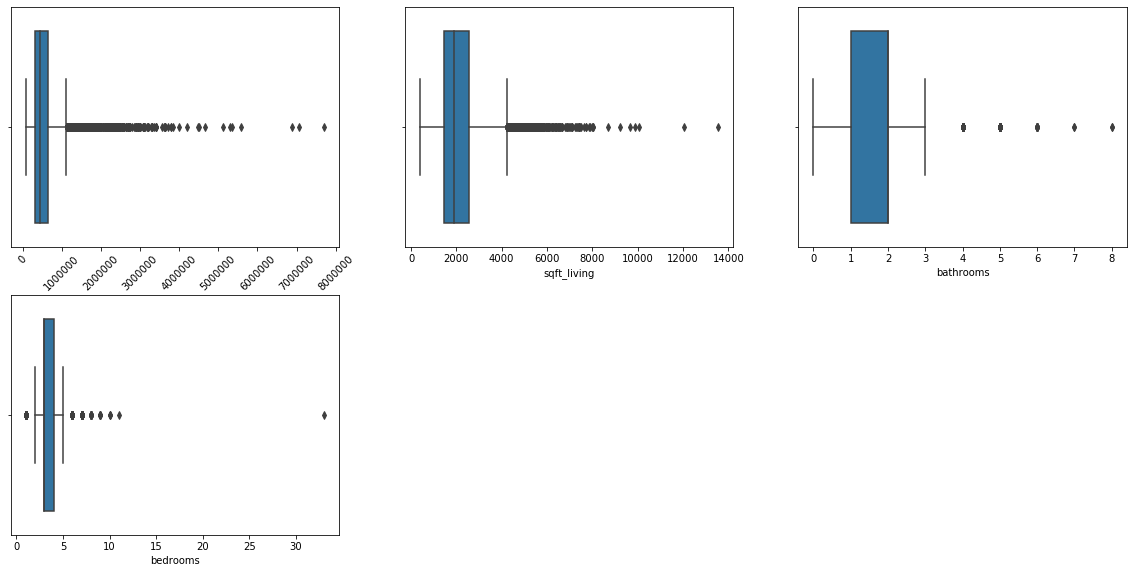

In [55]:
plt.figure(figsize=(20,15))
plt.subplot(331)
sns.boxplot(df.price)
plt.xticks(rotation = 45)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bathrooms.astype('int'))
plt.subplot(334)
sns.boxplot(df.bedrooms)



In [56]:
#remove outliers from the df

In [57]:
df = df[df.price < 3500000]
df = df[df.sqft_living < 8000]
df = df[df.bathrooms <4]
df = df[df.bedrooms < 5]

In [58]:
# recheck for normality

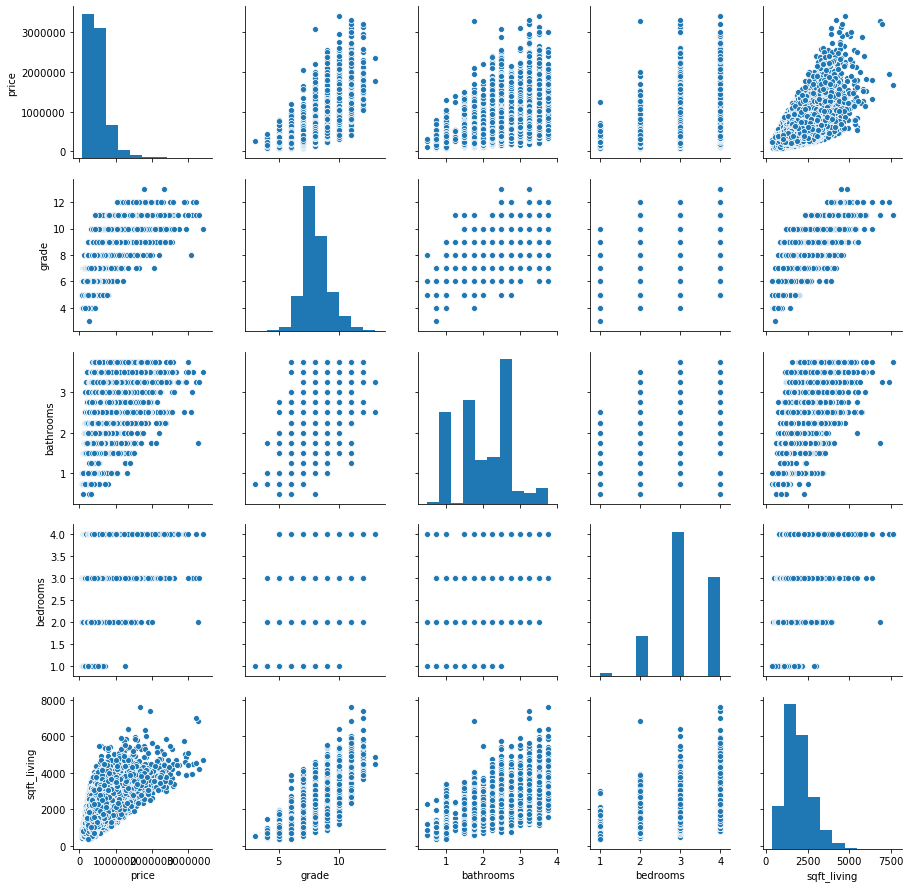

In [59]:
positively_correlated_cols = ['price','grade', 'bathrooms', 'bedrooms', 'sqft_living']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [20]:
fsm_df = df[['price', 'sqft_living']].copy()
fsm_df.dropna(inplace=True)

In [60]:
fsm = ols(formula='price ~ sqft_living', data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 1.313e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        21:26:33   Log-Likelihood:                 41053.
No. Observations:               19483   AIC:                        -8.210e+04
Df Residuals:                   19481   BIC:                        -8.209e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6602      0.008    210.288      0.000       1.645       1.676
sqft_living     0.4491      0.004    114.585      0.000       0.441       0.457
==============================================================================
Omnibus:                       93.248   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.584
Skew:                           0.023   Prob(JB):                     1.28e-15
Kurtosis:                       2.713   Cond. No.                         94.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Received a warning of possible strong mulicollinearity. Let's do some log transformation to make the data more normal. 

In [61]:
df.price = np.log(df.price)
df.sqft_living = np.log(df.sqft_living)



In [62]:
#retest the model with the newly log transformed data 

In [63]:
fsm_df = df[['price', 'sqft_living']].copy()
fsm_df.dropna(inplace=True)

In [69]:
fsm = ols(formula='sqft_living ~ price', data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                 1.359e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        21:27:39   Log-Likelihood:                -4671.5
No. Observations:               19483   AIC:                             9347.
Df Residuals:                   19481   BIC:                             9363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7730      0.058     13.387      0.000       0.660       0.886
price          0.5173      0.004    116.579      0.000       0.509       0.526
==============================================================================
Omnibus:                      453.367   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              485.464
Skew:                          -0.387   Prob(JB):                    3.83e-106
Kurtosis:                       3.005   Cond. No.                         343.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#test linearity

In [71]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print('Rainbow p-value:' , rainbow_p_value)

Rainbow statistic: 1.0196248753002723
Rainbow p-value: 0.16877568738111623


In [72]:
# the p-value is okay but still violates the linearity assumption

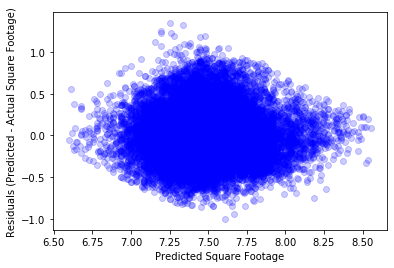

In [73]:
y = fsm_df['sqft_living']
y_hat = fsm_results.predict()

fig2, ax2 = plt. subplots()
ax2.set(xlabel='Predicted Square Footage',
        ylabel='Residuals (Predicted - Actual Square Footage)')
ax2.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2);

In [74]:
#time to add more features to get that r-squared up

In [82]:
model_2_df = df[['sqft_living','price','bathrooms']].copy()
model_2_df.dropna(inplace=True)


In [84]:
model_2 = ols(formula='price ~ sqft_living + bathrooms', data=model_2_df)
model_2_results = model_2.fit()

In [85]:
model_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     6830.
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        21:33:39   Log-Likelihood:                -8829.2
No. Observations:               19483   AIC:                         1.766e+04
Df Residuals:                   19480   BIC:                         1.769e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.3225      0.067    109.326      0.000       7.191       7.454
sqft_living     0.7473      0.010     74.571      0.000       0.728       0.767
bathrooms       0.0376      0.006      6.394      0.000       0.026       0.049
==============================================================================
Omnibus:                      107.578   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.761
Skew:                           0.115   Prob(JB):                     7.20e-21
Kurtosis:                       2.753   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_2_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9792382702192721
Rainbow p-value: 0.8497246803335826
